# Week 4. Active Learning Quiz 4

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

import numpy as np
import matplotlib.pyplot as plt

from sys import stdout

cuda = torch.cuda.is_available()

## Problem 1. CNN Implementation (75 + 5).

(1) Implement **MyCNN** and **checkpointing** and submit your results (60).

  Your submission **MUST** include

* Validation loss graph
* Validation accuracy graph
* Checkpointed weight file **best.pt** (via KLMS)

(Your Answer for Problem 1. Put validation results here.)

---


(2) Let's think of `MyMLP` of last class.

In [2]:
# Multi Layer Perceptron (MLP)
class MyMLP(nn.Module):
    def __init__(self):
        super(MyMLP, self).__init__()
        self.fc1 = nn.Linear(784,50)                   # nn.Linear(,)
        self.fc1_drop = nn.Dropout(0.2)                # nn.Dropout()
        self.fc2 = nn.Linear(50,50)                    # nn.Linear(,)
        self.fc2_drop = nn.Dropout(0.2)                # nn.Dropout()
        self.fc3 = nn.Linear(50, 10)                   # nn.Linear(,)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.tanh(self.fc1(x))
        x = self.fc1_drop(x)
        x = F.tanh(self.fc2(x))
        x = self.fc2_drop(x)

        return F.log_softmax(self.fc3(x), dim=0)

Below code section will show number of weights of `MyMLP`. Try to explain the answer for full credits.

In [3]:
# You may run this to get correct answer.
# However, you MUST explain the answer for full credits.
model_MLP = MyMLP()

num_weights = 0
for p in model_MLP.parameters():
    num_weights += p.reshape(-1).size(0)

print("Number of weights(MyMLP) = %d" %num_weights)

Number of weights(MyMLP) = 42310


* What is the total number of parameters (weights) of `MyMLP` and `MyCNN`? Briefly explain your answer; *just a single line formula would be enough*. (**15**).

* Compare between two. Which one is smaller? Which one showed better results? Discuss possible reasons. (**+5 Extra**)

  You may refer to validation result from last practice session below.


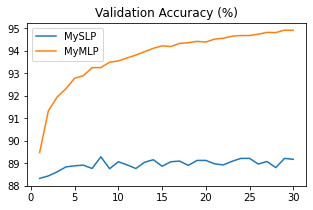


## Problem 2. Implement custom Convolution with numpy (25).


In this section, you will be asked to implement convolution using `numpy` package. We will ignore batch and channel dimensions, so all inputs and outputs are 2-dimensional arrays of size (width) × (height).

* Note that all inputs and outputs are `np.ndarray`s, not `torch.tensor`s.

* Assume no stride, padding, and dilations.

In [4]:
def conv2d_numpy(input_array, kernel):
    input_height, input_width = input_array.shape
    kernel_height, kernel_width = kernel.shape

    ## 2-1. Output Dimensions ##
    output_height = NotImplemented
    output_width = NotImplemented

    # in numpy, indexing is [row, col].
    result = np.zeros([output_height, output_width], dtype=np.float32)
    ## 2-1 End ##

    for y in range(output_height):
        for x in range(output_width):
            input_submatrix = input_array[y:y+kernel_height, x:x+kernel_width]

            ## 2-2. Convolution of submatrix with kernel ##
            result_xy = NotImplemented

            ## 2-2 End ## 
            result[y, x] = result_xy
    
    return result

Below tests will help you check your codes.

In [6]:
input_arrays = [np.array([[1, 2],
                          [3, 4],
                          [5, 6]], dtype=np.float32),
                np.array([[1, 2, 3],
                          [4, 5, 6],
                          [7, 8, 9],
                          [10, 11, 12]], dtype=np.float32),
                np.array([[2, 4, 3, 0],
                          [-3, -1, 0, 5]], dtype=np.float32)]

kernels = [np.array([[2], [3]], dtype=np.float32),
           np.array([[1, -1], [1, 1]], dtype=np.float32),
           np.array([[2, 1], [3, 2]], dtype=np.float32)]

desired_outputs = [np.array([[11., 16.],
                             [21., 26.]], dtype=np.float32),
                   np.array([[ 8., 10.],
                             [14., 16.],
                             [20., 22.]], dtype=np.float32),
                   np.array([[-3.,  8., 16.]], dtype=np.float32)]

for i in range(len(input_arrays)):
    print("Test %d." %(i+1))

    try:
        out_myconv = conv2d_numpy(input_arrays[i], kernels[i])
    except Exception as e:
        print("FAIL")
        break

    if(out_myconv.shape == desired_outputs[i].shape):
        print("size : correct", end=" / ")
        if(np.prod(out_myconv == desired_outputs[i])):
            print("value : correct", end="\t")
            print("pass")
        else:
            print("value : incorrect", end="\t")
            print("fail")
            print("Desired :\n", desired_outputs[i])
            print("Your output :\n", out_myconv)
            break

    else:
        print("size : incorrect.\tfail")
        print("Desired shape :\n", desired_outputs[i].shape)
        print("Your output shape :\n", out_myconv.shape)

Test 1.
FAIL
